*Questão 01 item c*

Importando as bibliotecas necessárias

In [498]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Pegando os dados e separando uma cópia para trabalho

In [499]:
data = np.genfromtxt("./artificial1d.csv", delimiter=",")
#separando os dados de work
work = data.copy()

Normalizando e separando os dados em X (features) e Y (valores esperados)

In [500]:
means = work.mean(0)
stds = np.sqrt((np.sum((work - means)**2,axis=0))/(work.shape[0] - 1))
work = (work - means)/stds #normalização por z-escore

X = work[:,[0]]
Y = work[:,[1]]

Otimizando os pesos por SGD

In [501]:
EPOCHS = 20 #número de iterações do algoritmo
ALPHA = 0.01 #metaparâmetro passo de aprendizado
W = np.ones((2,1)) #inicializando o vetor de pesos como 1
Y_pred = np.ones((Y.shape[0],1)) #inicializando o vetor de Y previstos
MSE = np.ones((EPOCHS,1)) #inicializando o vetor de erros para plotar depois
errors = np.ones((Y.shape[0],1))#inicializando o vetor de erros

for i in range(1, EPOCHS+1):
    #embaralhando os dados a cada época
    indexes = np.random.permutation(X.shape[0])
    X_shuf = X[indexes]
    Y_shuf = Y[indexes]

    for j in range(Y.shape[0]):
        Y_pred[j] = W[0, 0] + W[1, 0] * X_shuf[j]
        errors[j] = Y_shuf[j] - Y_pred[j]

        #ajustando os pesos com SGD
        W[0] += ALPHA*errors[j]
        W[1] += ALPHA*errors[j]*X_shuf[j]

    MSE[i-1] = np.mean(errors**2) #calculando o MSE dos erros no final de cada época

Plotando o gráfico do erro (curva de aprendizagem)

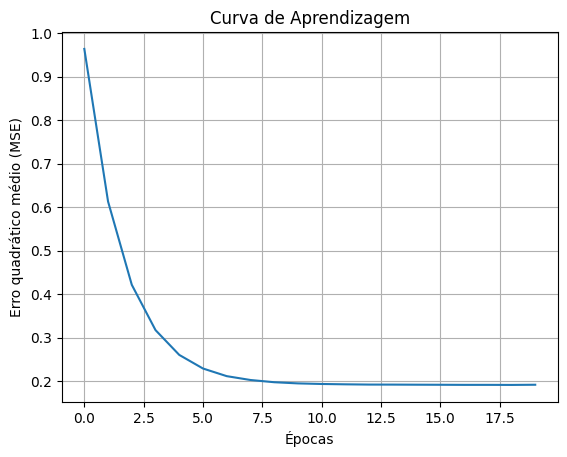

In [502]:
plt.plot(MSE)
plt.xlabel("Épocas")
plt.ylabel("Erro quadrático médio (MSE)")
plt.title("Curva de Aprendizagem")
plt.grid(True)
plt.show()

Plotando o gráfico dos dados

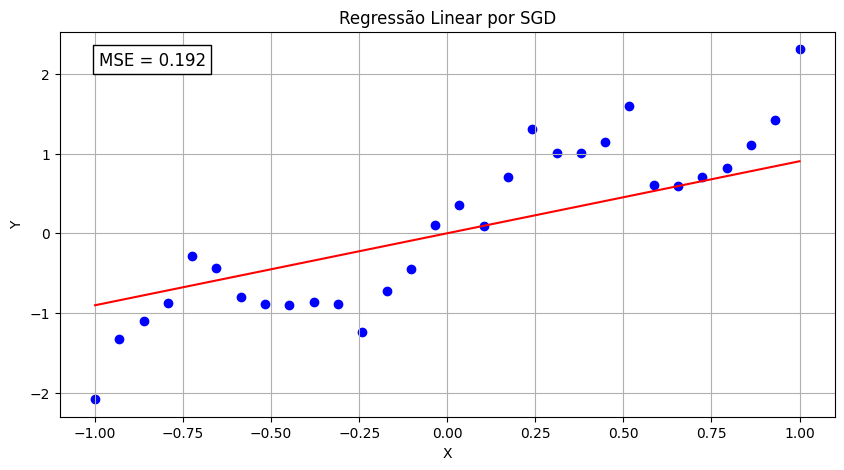

In [503]:
#desnormalizando os dados de treino e as previsões
Y = Y*stds[1] + means[1]
X = X*stds[0] + means[0]
Y_pred = W[0] + W[1]*X

mse = MSE[EPOCHS-1,0]

# Plotando
plt.figure(figsize=(10, 5))
plt.scatter(X, Y, color='blue', label='Dados de treino')
plt.plot(X, Y_pred, color='red', label='Regressão linear (SGD)')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Regressão Linear por SGD")
plt.text(0.05, 0.95, f"MSE = {mse:.3f}", transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black'))
plt.grid(True)
plt.show()